In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

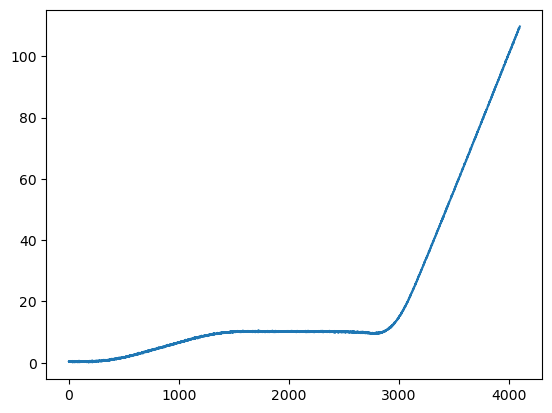

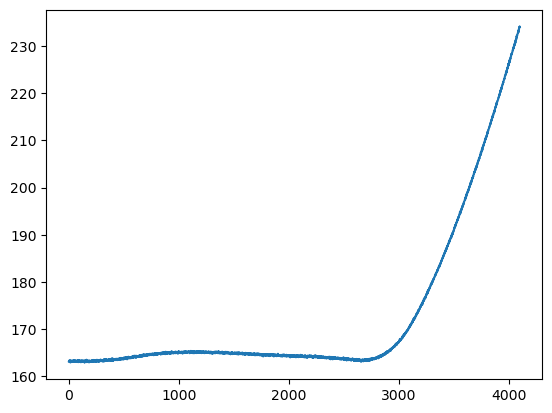

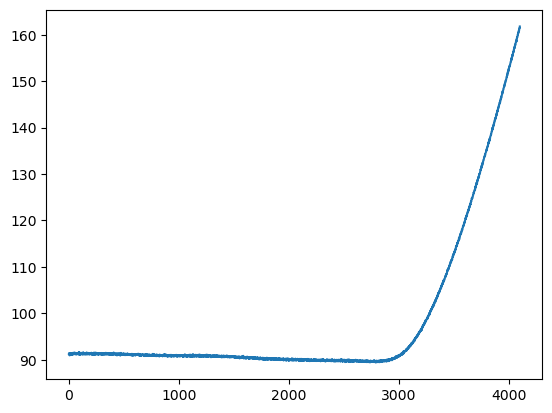

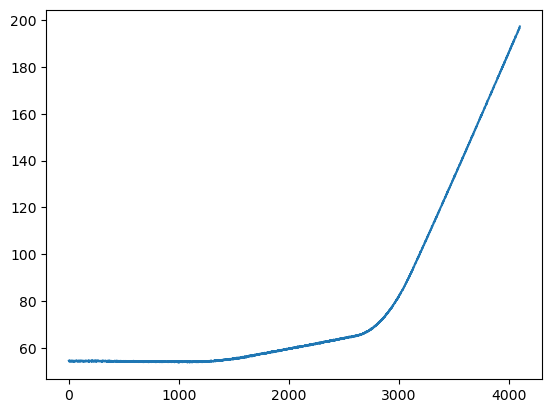

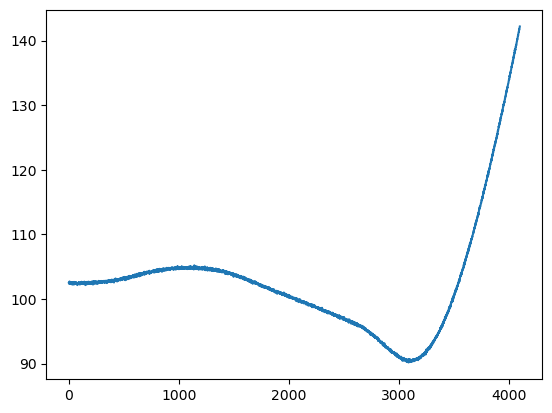

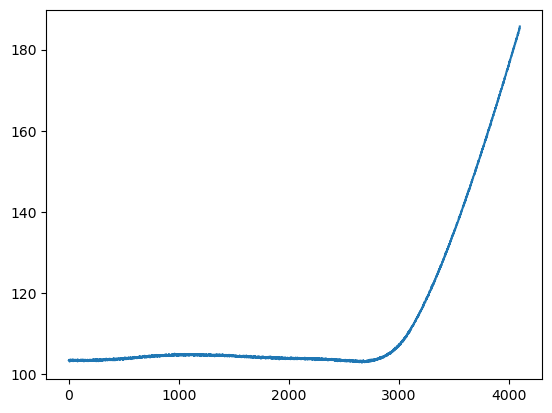

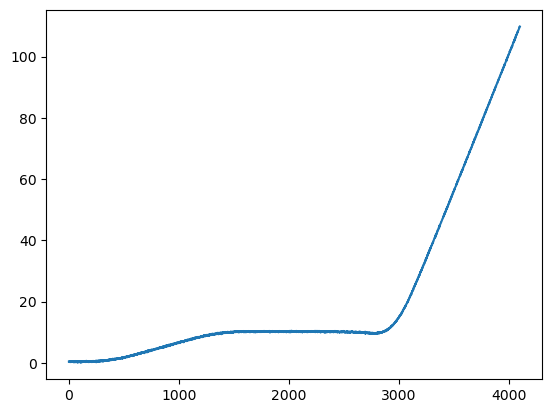

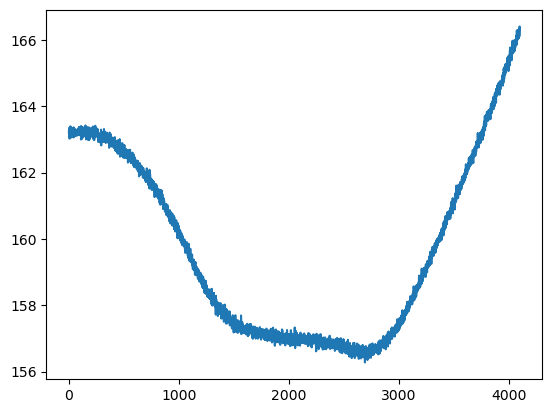

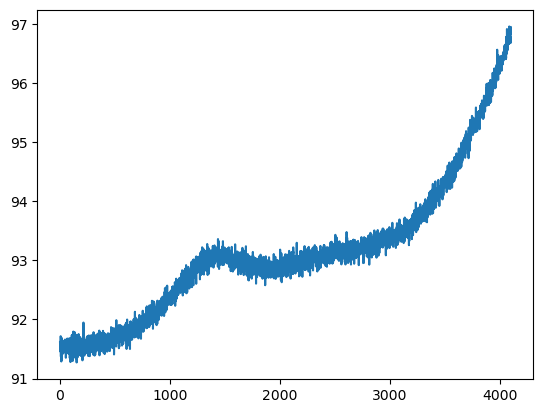

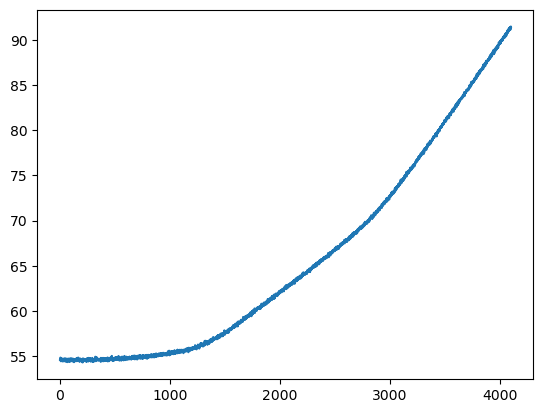

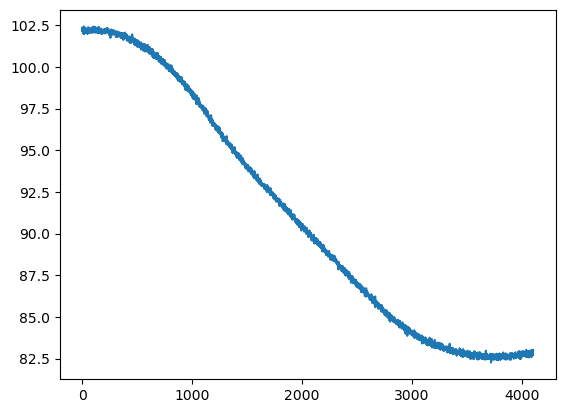

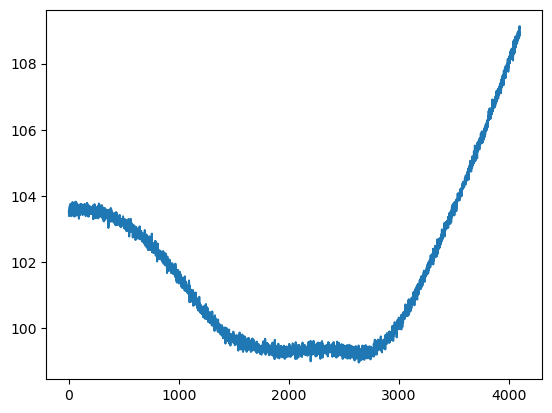

In [2]:
data_dir = 'data'
agents = os.listdir(data_dir)
# trim agent if agent is not in name
agents = [a for a in agents if 'agent' in a]
ref_pos_files = [f'{data_dir}/{a}/ref_pos.csv' for a in agents]
ref_pos = {}
for refs in ref_pos_files:
    agent_dir = refs.split('/')[-2]
    data = np.genfromtxt(refs, delimiter=',')[1:]
    ref_pos[agent_dir] = data

# generate uwb static beacons
STATIC_STD_FROM_START = 100
dict_items = ref_pos.items()
a1, ref1 = next(iter(dict_items))
starting_pos = ref1[0,:]
for i in range(5):
    ref_pos[f'static{i}'] = np.full(ref1.shape, starting_pos + np.random.normal(scale=STATIC_STD_FROM_START, size=3))

for a1,ref1 in ref_pos.items():
    for a2,ref2 in ref_pos.items():
        if ref1 is ref2:
            continue
        if "static" in a1:
            continue
        dist = np.linalg.norm(ref1 - ref2, axis=1)
        noise = np.random.normal(scale=.1, size=dist.shape)
        dist = dist + noise
        if "static" in a2:
            np.savetxt(f'{data_dir}/{a1}/uwb-{a2}.csv', np.hstack((dist.reshape(-1,1),ref2)), delimiter=',')
        else:
            np.savetxt(f'{data_dir}/{a1}/uwb-{a2}.csv', dist.reshape(-1,1), delimiter=',')
        plt.figure()
        plt.plot(dist)